# **MELANOMA CANCER PREDICTION**
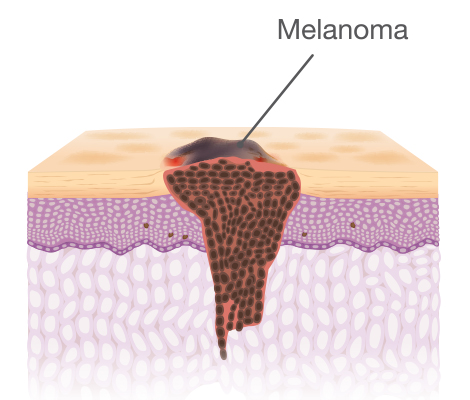

In [ ]:
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import os
from keras.models import Sequential
from keras.layers import  Conv2D,Dense,MaxPool2D,Flatten

In [ ]:
datadir='/content/drive/MyDrive/melanoma_cancer_dataset/train'
os.listdir(datadir)

['malignant', 'benign']

In [ ]:
X_train=[]
Y_train=[]
categories=['benign', 'malignant']
for category in categories:
  path=os.path.join(datadir,category)
  images=os.listdir(path)
  for img in images:
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resized=resize(img_array,(150,150,1))
    X_train.append(img_resized)
    Y_train.append(categories.index(category))
  print("Loading.....",category)

Loading..... benign
Loading..... malignant


In [ ]:
datadir='/content/drive/MyDrive/melanoma_cancer_dataset/test'
X_test=[]
Y_test=[]
categories=['benign', 'malignant']
for category in categories:
  path=os.path.join(datadir,category)
  images=os.listdir(path)
  for img in images:
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resized=resize(img_array,(150,150,1))
    X_test.append(img_resized)
    Y_test.append(categories.index(category))
  print("Loading.....",category)

Loading..... benign
Loading..... malignant


In [ ]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [ ]:
X_train.shape,Y_train.shape

((9653, 150, 150, 1), (9653,))

In [ ]:
X_test.shape,Y_test.shape

((1010, 150, 150, 1), (1010,))

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:

model.fit(X_train,Y_train,epochs=20,batch_size=12)

Epoch 1/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7491 - loss: 0.4860
Epoch 2/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8441 - loss: 0.3434
Epoch 3/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8710 - loss: 0.2912
Epoch 4/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8795 - loss: 0.2715
Epoch 5/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8943 - loss: 0.2492
Epoch 6/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9020 - loss: 0.2271
Epoch 7/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9174 - loss: 0.2050
Epoch 8/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9204 - loss: 0.1926
Epoch 9/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9365 - loss: 0.1623
Epoch 10/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9455 - loss: 0.1427
Epoch 11/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9593 - loss: 0.1080
Epoch 12/20
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [ ]:
model.evaluate(X_test,Y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8626 - loss: 0.8384


[0.6408185362815857, 0.8811880946159363]

In [ ]:
img=imread('/content/drive/MyDrive/melanoma_cancer_dataset/test/benign/melanoma_10005.jpg')   #1st one in test data (malignant),#6th one in the test data(benign)

In [ ]:
img=resize(img,(1,150,150,1))
img.shape

(1, 150, 150, 1)

In [ ]:
Y_new=model.predict(img)
ind=Y_new.argmax()
categories[ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


'malignant'

In [ ]:
model.save('cnn_model.h5')
from google.colab import files
files.download('cnn_model.h5')